In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

df = pd.read_csv('C:\\Users\\suhani.timbadia\\Documents\\Personal Projects\\coup_prediction\\data\\Coup data 2.1.2.csv')
print(df.head())
print("Shape:", df.shape)
print(df.info())
display(df.describe())

       coup_id  cowcode      country  year  month  day  event_type  \
0  70003101963      700  Afghanistan  1963      3   10        coup   
1  70007171973      700  Afghanistan  1973      7   17        coup   
2  70009201973      700  Afghanistan  1973      9   20   attempted   
3  70011261976      700  Afghanistan  1976     11   26  conspiracy   
4  70004271978      700  Afghanistan  1978      4   27        coup   

   unrealized  realized  conspiracy  attempt  military  dissident  rebel  \
0           0         1           0        0         0          0      0   
1           0         1           0        0         1          0      0   
2           1         0           0        1         1          1      0   
3           1         0           1        0         1          1      0   
4           0         1           0        0         1          1      0   

   palace  foreign  auto  resign  popular  counter  other  noharm  injured  \
0       0        0     1       0        0   

,cowcode,year,month,day,unrealized,realized,conspiracy,attempt,military,dissident,rebel,palace,foreign,auto,resign,popular,counter,other,noharm,injured,killed,harrest,jailed,tried,fled,exile
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,439.515800,1979.112130,6.574924,15.873598,0.550459,0.449541,0.194699,0.355759,0.602446,0.298675,0.063201,0.133537,0.077472,0.041794,0.086646,0.097859,0.020387,0.016310,0.949032,0.008155,0.042813,0.041794,0.055046,0.010194,0.078491,0.048930
std,244.434234,19.291419,3.536074,8.804239,0.497701,0.497701,0.396171,0.478987,0.489642,0.457910,0.243448,0.340328,0.267475,0.200220,0.281460,0.297276,0.141393,0.126729,0.220045,0.089982,0.202540,0.200220,0.228186,0.100499,0.269080,0.215831
min,2.000000,1945.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,160.000000,1964.000000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,461.000000,1978.000000,7.000000,16.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,630.000000,1992.000000,10.000000,23.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,950.000000,2022.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


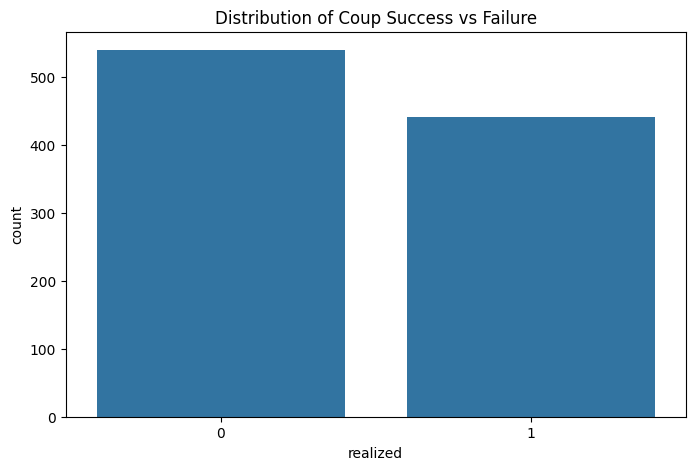

In [3]:
df["realized"].value_counts(), df["realized"].value_counts(normalize=True)

plt.figure(figsize=(8, 5))
sns.countplot(x='realized', data=df)
plt.title('Distribution of Coup Success vs Failure')
plt.show()

Remaining features: 21


<Figure size 640x480 with 0 Axes>

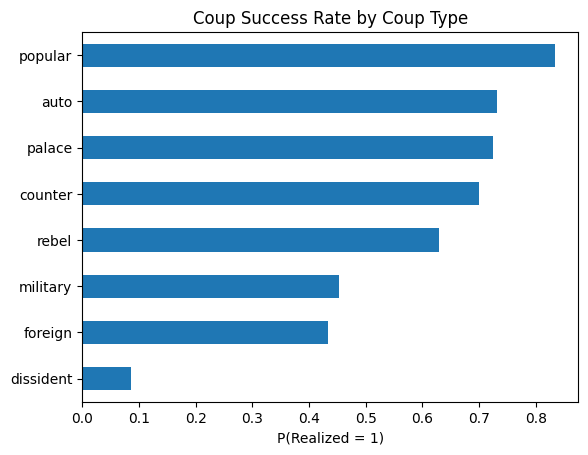

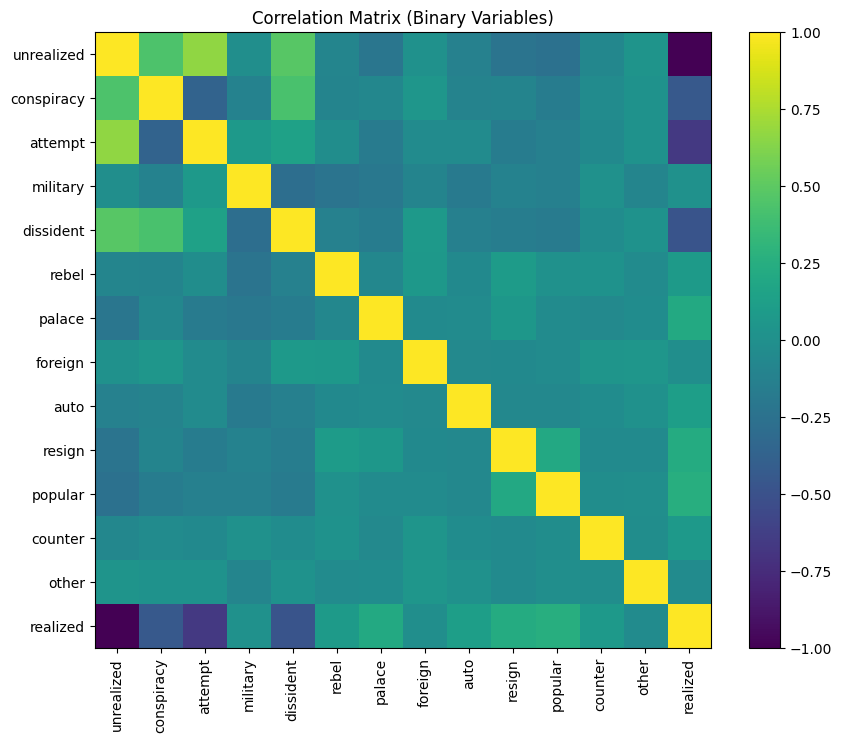

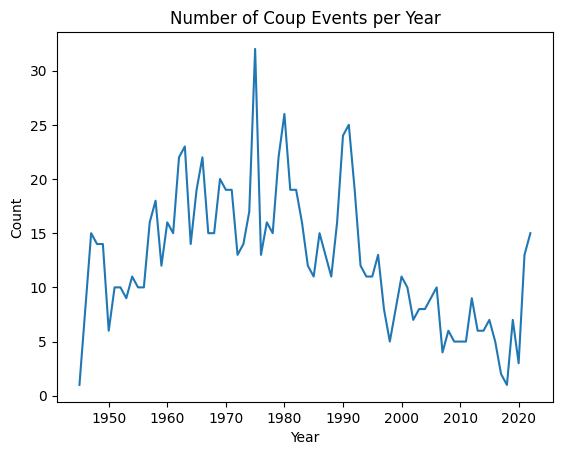

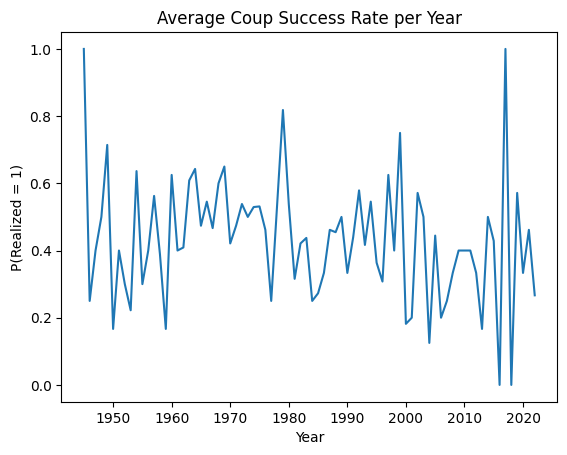

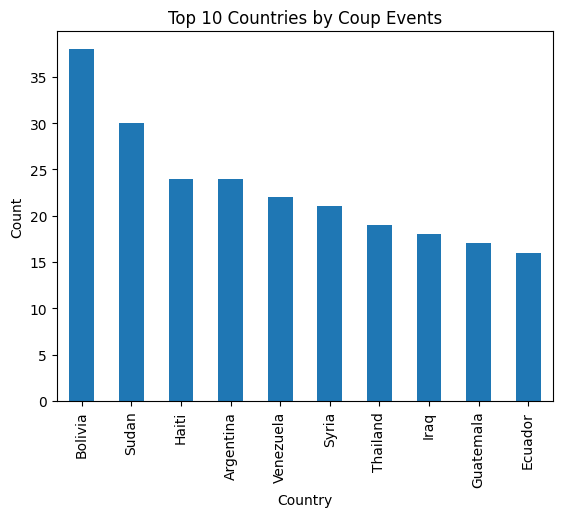

In [4]:
leakage_cols = [
    "noharm", "injured", "killed",
    "harrest", "jailed", "tried",
    "fled", "exile"
]

df = df.drop(columns=[c for c in leakage_cols if c in df.columns])

print("Remaining features:", df.shape[1])

binary_features = [
    c for c in df.columns
    if df[c].nunique() == 2 and c != "realized"
]

binary_features

coup_types = [
    "military", "dissident", "rebel",
    "palace", "foreign", "auto",
    "popular", "counter"
]

success_rate = {}

for c in coup_types:
    if c in df.columns:
        success_rate[c] = df[df[c] == 1]["realized"].mean()

sr_df = pd.DataFrame.from_dict(
    success_rate, orient="index", columns=["success_rate"]
)

plt.figure()
sr_df.sort_values("success_rate").plot(kind="barh", legend=False)
plt.title("Coup Success Rate by Coup Type")
plt.xlabel("P(Realized = 1)")
plt.show()

corr_cols = binary_features + ["realized"]
corr = df[corr_cols].corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix (Binary Variables)")
plt.show()

coups_per_year = df.groupby("year")["realized"].count()

plt.figure()
coups_per_year.plot()
plt.title("Number of Coup Events per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

success_per_year = df.groupby("year")["realized"].mean()

plt.figure()
success_per_year.plot()
plt.title("Average Coup Success Rate per Year")
plt.xlabel("Year")
plt.ylabel("P(Realized = 1)")
plt.show()

top_countries = df["country"].value_counts().head(10)

plt.figure()
top_countries.plot(kind="bar")
plt.title("Top 10 Countries by Coup Events")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

In [5]:
low_variance = [
    c for c in df.columns
    if df[c].nunique() <= 1
]

low_variance

print("Final shape:", df.shape)
print("Binary predictors:", len(binary_features))
print("Years covered:", df["year"].min(), "-", df["year"].max())

Final shape: (981, 21)
Binary predictors: 13
Years covered: 1945 - 2022


In [6]:
id_cols = ["coup_id"]

df = df.drop(columns=[c for c in id_cols if c in df.columns])

redundant_cols = [
    "event_type", "unrealized",
    "conspiracy", "attempt"
]

df = df.drop(columns=[c for c in redundant_cols if c in df.columns])

df.isnull().sum()

cowcode      0
country      0
year         0
month        0
day          0
realized     0
military     0
dissident    0
rebel        0
palace       0
foreign      0
auto         0
resign       0
popular      0
counter      0
other        0
dtype: int64

In [7]:
# Normalize year (helps optimization)
# Normalize year (helps optimization)
df["year_norm"] = (df["year"] - df["year"].min()) / (df["year"].max() - df["year"].min())

# Cyclical encoding for month (only if month exists)
if "month" in df.columns:
    df["month_sin"] = np.sin(2 * np.pi * df["month"] / 12)
    df["month_cos"] = np.cos(2 * np.pi * df["month"] / 12)
    df = df.drop(columns=["month"])

# Drop day if present
if "day" in df.columns:
    df = df.drop(columns=["day"])

# Add country frequency if country exists, then drop country/cowcode if present
if "country" in df.columns:
    country_freq = df["country"].value_counts(normalize=True)
    df["country_freq"] = df["country"].map(country_freq)

df = df.drop(columns=[c for c in ["country", "cowcode"] if c in df.columns])

# Drop original year column now that normalized version exists
if "year" in df.columns:
    df = df.drop(columns=["year"])


In [8]:
X = df.drop(columns=["realized"])
y = df["realized"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (981, 14)
y shape: (981,)


In [9]:
# Check binary columns
binary_cols = [c for c in X.columns if X[c].nunique() == 2]
len(binary_cols), binary_cols

# Check value ranges
X.describe()


,military,dissident,rebel,palace,foreign,auto,resign,popular,counter,other,year_norm,month_sin,month_cos,country_freq
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,9.810000e+02,9.810000e+02,981.000000
mean,0.602446,0.298675,0.063201,0.133537,0.077472,0.041794,0.086646,0.097859,0.020387,0.016310,0.443015,6.899031e-03,4.897344e-02,0.013104
std,0.489642,0.457910,0.243448,0.340328,0.267475,0.200220,0.281460,0.297276,0.141393,0.126729,0.250538,7.126433e-01,7.005080e-01,0.008407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000e+00,-1.000000e+00,0.001019
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.246753,-5.000000e-01,-5.000000e-01,0.008155
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.428571,-2.449294e-16,6.123234e-17,0.012232
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.610390,8.660254e-01,8.660254e-01,0.015291
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,0.038736


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to numpy arrays if not already
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

print(f"Training set: {X_train_scaled.shape}, {y_train.shape}")
print(f"Test set: {X_test_scaled.shape}, {y_test.shape}")
print(f"Class distribution in train: {np.bincount(y_train.flatten())}")
print(f"Class distribution in test: {np.bincount(y_test.flatten())}")

Training set: (784, 14), (784, 1)
Test set: (197, 14), (197, 1)
Class distribution in train: [432 352]
Class distribution in test: [108  89]


In [11]:
# Save preprocessed data for use with different models
data_path = 'C:\\Users\\suhani.timbadia\\Documents\\Personal Projects\\coup_prediction\\data'

np.save(f'{data_path}\\X_train.npy', X_train_scaled)
np.save(f'{data_path}\\X_test.npy', X_test_scaled)
np.save(f'{data_path}\\y_train.npy', y_train)
np.save(f'{data_path}\\y_test.npy', y_test)

print("Preprocessed data saved successfully!")
print(f"Files saved to: {data_path}")
print(f"  - X_train.npy: {X_train_scaled.shape}")
print(f"  - X_test.npy: {X_test_scaled.shape}")
print(f"  - y_train.npy: {y_train.shape}")
print(f"  - y_test.npy: {y_test.shape}")
print("\nThese files can now be used to train multiple models.")

Preprocessed data saved successfully!
Files saved to: C:\Users\suhani.timbadia\Documents\Personal Projects\coup_prediction\data
  - X_train.npy: (784, 14)
  - X_test.npy: (197, 14)
  - y_train.npy: (784, 1)
  - y_test.npy: (197, 1)

These files can now be used to train multiple models.


## Training Models

The neural network now includes several improvements:
- **Adam optimizer** (manually implemented)
- **L2 regularization** (Ridge)
- **Dropout** regularization
- **Early stopping**
- **Learning rate decay**

### Quick Start - Train with Adam Optimizer

```python
import sys
sys.path.append('C:\\Users\\suhani.timbadia\\Documents\\Personal Projects\\coup_prediction')
from models.train_neural_network import train_and_evaluate, plot_results

# Train with improved model (Adam + regularization)
model, metrics = train_and_evaluate(
    X_train_scaled, X_test_scaled, y_train, y_test,
    layer_sizes=[X_train_scaled.shape[1], 32, 16, 1],  # Deeper network
    learning_rate=0.001,                                # Lower LR for Adam
    optimizer='adam',                                   # Use Adam optimizer
    l2_lambda=0.01,                                     # L2 regularization
    dropout_rate=0.2,                                   # 20% dropout
    epochs=2000,
    batch_size=32,
    early_stopping_patience=50                          # Stop if no improvement
)

# Plot results
plot_results(model, metrics)
```

### Compare Different Optimizers

```python
# Compare SGD vs Adam vs RMSprop
optimizers = ['sgd', 'adam', 'rmsprop']
results = {}

for opt in optimizers:
    lr = 0.01 if opt == 'sgd' else 0.001  # SGD needs higher LR
    model, metrics = train_and_evaluate(
        X_train_scaled, X_test_scaled, y_train, y_test,
        optimizer=opt,
        learning_rate=lr,
        epochs=500,
        verbose=False
    )
    results[opt] = metrics
    print(f"\n{opt.upper()} - Test Accuracy: {metrics['test']['accuracy']:.4f}")
```

See `models/README.md` for detailed documentation on all improvements.